# <center>**Hand Pose Detection**</center>

## **Summary**
<p>The ability to perceive the shape and motion of hands can be a vital component in improving the user experience across a variety of technological domains and platforms.</p>
<p>MediaPipe Hands is a high-fidelity hand and finger tracking solution. It employs machine learning (ML) to infer 21 3D landmarks of a hand from just a single frame. Whereas current state-of-the-art approaches rely primarily on powerful desktop environments for inference, our method achieves real-time performance on a mobile phone, and even scales to multiple hands.</p>
<p>In this model, a palm detection model that operates on the full image and returns an oriented hand bounding box. A hand landmark model that operates on the cropped image region defined by the palm detector and returns high-fidelity 3D hand keypoints.</p>
<img src="https://google.github.io/mediapipe/images/mobile/hand_landmarks.png" aligin="center">

## **Reference**
<ul>
    <li><a href="https://google.github.io/mediapipe/solutions/hands">Official Website</a></li>
    <li><a href="https://github.com/google/mediapipe">Official Repository</a></li>
</ul>

## **Download Libraries**

In [1]:
#!pip install mediapipe

In [2]:
#conda install opencv

## **Import Libraries**

In [14]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os

## **Hand Detector**
<p>
</p>

In [4]:
class handDetector():
    def __init__(self, mode=False, maxHands=2, modelComplexity=1, detectionCon=0.5, trackCon=0.5):
        """
        Description: Constructpr
        mode: If set to false, the solution treats the input images as a video stream. It will try to detect hands in the 
                first input images, and upon a successful detection further localizes the hand landmarks.
        detectionCon: Confidence of detect hands
        maxHands: maximum hands should be detected
        modelComplexcity: Complexity of the hand landmark model: 0 or 1. Landmark accuracy as well as inference latency 
                            generally go up with the model complexity. Default to 1.
        trackCon: Minimum confidence value ([0.0, 1.0]) from the landmark-tracking model for the hand landmarks to be considered 
                    tracked successfully, or otherwise hand detection will be invoked automatically on the next input image.
        """
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.trackCon = trackCon
        self.mpHands = mp.solutions.hands
        self.modelComplex = modelComplexity
        self.hands = self.mpHands.Hands(self.mode, self.maxHands, self.modelComplex, self.detectionCon, self.trackCon)
        self.mpDraw = mp.solutions.drawing_utils
        self.tipIds = [4,  8, 12, 16, 20]
    
    def findHands(self, img, draw=True):
        """
        Description: Find hands from the image
        img: image from which hand is detected
        draw: if true, all 21 points should be connected
        """
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB)
        if self.results.multi_hand_landmarks:
            for handLms in self.results.multi_hand_landmarks:
                if draw:
                    self.mpDraw.draw_landmarks(img, handLms, self.mpHands.HAND_CONNECTIONS)
        return img
    
    def findPosition(self, img, handNo=0, draw = True):
        """
        Description: Coordinates of 21 points are detected and coordinartes of the points are returned as list and
                        bbox are drawn around the hand.
        img: image from which hand is detected
        handNo: handNo denotes which hand's coordinate is detected and returned
        draw: A bbocx all the 21 points are drawn
        """
        xList = []
        yList = []
        lmList = []
        bbox = []
        if self.results.multi_hand_landmarks:
            myHand = self.results.multi_hand_landmarks[handNo]
            for id, lm in enumerate(myHand.landmark):
                h, w, c = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                xList.append(cx)
                yList.append(cy)
                lmList.append( [id, cx, cy])
                if draw:
                    cv2.circle(img, (cx, cy), 10, (255, 0, 255), cv2.FILLED)
            xmin, xmax = min(xList), max(xList)
            ymin, ymax = min(yList), max(yList)
            bbox = xmin, ymin, xmax, ymax
            if draw:
                cv2.rectangle(img, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 5)
        return lmList

## **Load Test Images**

In [5]:
# Move to the dataset folder to load test images
os.chdir("..")
os.chdir("Dataset")

In [6]:
# Load images
img_list = ["front-back.jpg", "hand.jpg", "handsign.jpg", "right-frontal.jpg"]
images = []
for img in img_list:
    images.append(cv2.imread(img))

## **Test and Save Results**

In [7]:
# Move to images folder to save results
os.chdir("..")
os.chdir("Images")

In [8]:
# Create instance of handDetecrtor()
detector = handDetector()

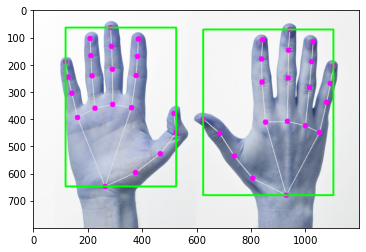

In [9]:
# Test first image
img = detector.findHands(images[0])
detector.findPosition(img)
detector.findPosition(img, handNo=1)
cv2.imwrite(img_list[0], img)
plt.imshow(img)

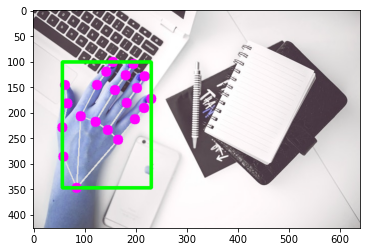

In [10]:
# Test second image
img = detector.findHands(images[1])
detector.findPosition(img)
cv2.imwrite(img_list[1], img)
plt.imshow(img)

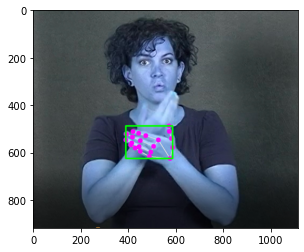

In [11]:
# Test third image
img = detector.findHands(images[2])
detector.findPosition(img)
cv2.imwrite(img_list[2], img)
plt.imshow(img)

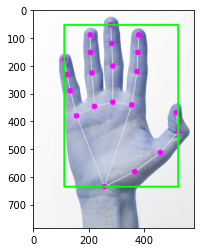

In [12]:
# Test fourth image
img = detector.findHands(images[3])
detector.findPosition(img)
cv2.imwrite(img_list[3], img)
plt.imshow(img)